<h2>Task 1: </h2>
<h3>Analysing Pre-trained Word Embeddings (6 Points)</h3>


In [26]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import math

In [27]:
"""
    Following function returns pretrained glove model in the dictionary format.
    The keys will be all the words in vocabulary.
    The value will be the corresponding vector.
"""

def load_glove_model(filename):
    model = {}
    with open(filename, 'r', encoding='utf-8') as f:  # I have added the encoding to solve the error
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            model[word] = embedding
    print("Model loaded !")
    print(f"{len(model)} words found with {len(model[word])} vector size !")
    return model

In [28]:
filename = "./glove.6B.50d.txt" # I have downloaded it from KAGGLE
model = load_glove_model(filename)
vocab = list(model.keys())

Model loaded !
400000 words found with 50 vector size !


#### Complete the following cosine and euclidean distance functions

In [29]:
def cosine_distance(vec_a, vec_b):
    """
    The definition of cosine distance is : Cos(x, y) = x . y / ||x|| * ||y||
    where . is dot product and * is cross product and ||x|| is the length of the vector x
    """
    num = sum(x*y for x, y in zip(vec_a, vec_b))
    denum = math.sqrt(sum(i**2 for i in vec_a)) * math.sqrt(sum(i**2 for i in vec_b))
    dist = num / denum
    
    return dist

In [30]:
def euclidean_distance(vec_a, vec_b):
    """
    Calculates euclidean distance between two vectors.
    """
    temp = sum( (x-y)**2 for x,y in zip(vec_a, vec_b) )
    dist = math.sqrt( temp )

    return dist

<h4>Part a:</h4>


#### Chose random pairs of words as mentioned in the sheet and create an array of 'common_words'

In [32]:
common_words = ['glass', 'cup', 'table', 'desk', 'pen', 'pencil', 'book', 'notebook', 'bag', 'purse',
               'dog', 'chair', 'eye', 'blanket', 'towel', 'helmet', 'door', 'paper', 'violin', 'shoe']

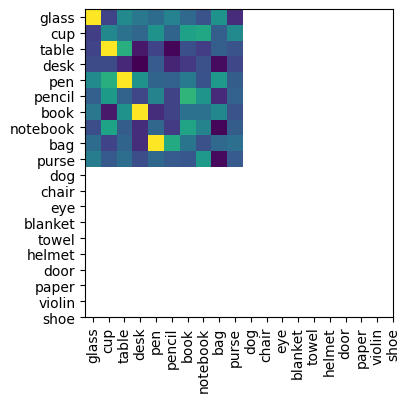

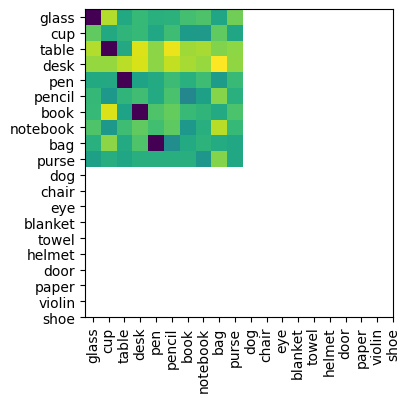

In [33]:
for i in [cosine_distance, euclidean_distance]:
    sim = []
    for j in common_words:
        temp = []
        for k in common_words:
            temp.append(i(model[j], model[k]))
        sim.append(temp)
    data = np.array(sim)
    data.resize(10, 10)
    plt.figure(figsize = (4, 4))
    plt.imshow(data, interpolation='nearest')
    plt.xticks(range(20), common_words, rotation=90);
    plt.yticks(range(20), common_words);
    plt.show()

<h4>State your observations and analysis here:</h4>
<p>...</p>

<h4>Part b:</h4>

#### Perform PCA on the obtained word vectors and plot the first two components.

In [ ]:
import numpy as np

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [ ]:
vocab_vec = [model[w] for w in vocab]
# TODO perform PCA on 'vocab_vec' to get two components

In [9]:
display_words = np.concatenate([np.array(common_words), np.random.choice(vocab, 40)])
plt.figure(figsize=(8, 8))

# TODO: Visualize the PCA for the previously selected common words 
plt.show()

NameError: name 'np' is not defined

<h4>State your observations and analysis here:</h4>
<p>...</p>

<h2>Task 2: </h2>
<h3>Computing Word Embeddings : Word2Vec (12 points)</h3>
<h4>Part a:</h4>


#### Train the following CBOW and SkipGram models by completing their 'forward' functions. Use appropriate activation functions wherever necessary.

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from nltk.tokenize import sent_tokenize

In [38]:
raw_text = """The stand up was by far the best one. The comedy special was horrible. This movie also has a very good ending. The ending was sorry as I just didn't care for the characters. The plot is tight and the acting is flawless. The plot is predictable and the movie is long. Good historical drama which is very educational and entertaining. It was entirely over dramatic and boring. The romance of the movie is good and nicely presented. It was the most terrible romance movie I had ever watched. Movie has a unique science fiction element which makes it hillarious. The old science fiction trope is overused and stale. This movie is rich with action and gore. To make it interesting, they threw in some gore but were unsuccessful. The cinematography is outstanding. This movie had an inconsistent cinematography. For a comedy this has a decent and inventive plot. The plot is an absolute mess. The movie has lots of plot twists which has a huge payoff. There are so many plot twists that you can never be sure to root for. The story and ending were so brutal that they made up for a lot. There was no explanation, the ending was incomplete. Great story line, fantastic music, great visual effects. Thread bare plot, bad acting, bad visual effects. A great concept, a great cast and I loved it. The concept was hardly original."""

In [12]:
class CBOW(nn.Module):
  
    def __init__(self, vocab_size, context_size, embedding_dim):
        super(CBOW, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        #self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        # TODO: Complete the function
        output = None
        return output

NameError: name 'nn' is not defined

In [13]:
class SkipGram(nn.Module):
    
    def __init__(self, vocab_size, context_size, embedding_dim):
        super(SkipGram, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, context_size * vocab_size)
        self.context_size = context_size

    def forward(self, inputs):
        # TODO: Complete the function
        # Hint: Exactly same as CBOW forward function just have to use
        # 'context_size' in the last layer to resize view
        output = None
        return output

NameError: name 'nn' is not defined

In [66]:
from spacy.lang.en import English
import string 

nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer = nlp.tokenizer

#raw_text for test
raw_text =     "We are about to study the idea of business"


#removing punctuations
first_doc = raw_text
all_punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
first_doc = first_doc.translate(str.maketrans('','',string.punctuation))
first_doc = [token.text for token in tokenizer(first_doc)]
first_doc



['We', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'business']

In [60]:
def generate_training_data(raw_text, context_size, CBOW=True):
    """
    TODO:
    Generate training data from the raw text in appropriate format. An output
    containing list of tuples of context and target is expected. A context will
    be list of words and target will be singular word.
    Based on 'CBOW' boolean list of tuples will be either
    [(context, target), ...] or if false it will be [(target, context), ...]

    For eg for the following raw_text =
    "We are about to study the idea of business"
    with CBOW = True and context_size = 2, we get (list with five tuples):

    "We are to study" -> (['We', 'are', 'to', 'study'], 'about')
    "are about study the" -> (['are', 'about', 'study', 'the'], 'to')
    "about to the idea" -> (['about', 'to', 'the', 'idea'], 'study')
    "to study idea of" -> (['to', 'study', 'idea', 'of'], 'the')
    "study the of business" -> (['study', 'the', 'of', 'business'], 'idea')]

    Similarly if CBOW = False i.e. dataset is for skip gram then:
    
    "We are to study" -> ('about', ['We', 'are', 'to', 'study'])
    .
    .
    .

    """
    data = []
    for i in range(context_size, len(first_doc)-context_size):
        temp = []
        for j in range(i - context_size, i):
            temp.append(first_doc[j])
        for j in range(i+1, i + context_size+1):
            temp.append(first_doc[j])

        temp2 = ( temp, first_doc[i] )
        data.append(temp2)
        
    return data

In [67]:
generate_training_data(raw_text, context_size, CBOW=True)

[(['We', 'are', 'to', 'study'], 'about'),
 (['are', 'about', 'study', 'the'], 'to'),
 (['about', 'to', 'the', 'idea'], 'study'),
 (['to', 'study', 'idea', 'of'], 'the'),
 (['study', 'the', 'of', 'business'], 'idea')]

In [65]:
def get_training_data_idx(word_to_ix, data):
    """
    This function is to get idx values from the vocabulary for training data.

    For eg:
    CBOW
    Input: [(['We', 'are', 'to', 'study'], 'about'), ...]
    Output: [(tensor([ 34,  55,  96, 125]), tensor([6])), ...]

    SkipGram
    Input: [('about', ['We', 'are', 'to', 'study']), ...]
    Output: [(tensor([6]), tensor([ 34,  55,  96, 125])), ...]

    word_to_idx is already provided
    """
    output = []
    for i in data:
        if isinstance(i[0], list):
            a = torch.tensor([word_to_ix[w] for w in i[0]], dtype=torch.long)
            b = torch.tensor([word_to_ix[i[1]]], dtype=torch.long)
        else:
            a = torch.tensor([word_to_ix[i[0]]], dtype=torch.long)
            b = torch.tensor([word_to_ix[w] for w in i[1]], dtype=torch.long)
        output.append((a, b))
    return output

In [ ]:
def train(model, data, loss_function, optimizer, num_epochs):
    # TODO: Complete the training function
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for context, target in data:
            #
            #
        if epoch % 10 == 0:
            print (f'Epoch [{epoch} / {num_epochs}], Loss: {loss.item():.4f}')

        losses.append(total_loss)
    return losses

In [ ]:
context_size = 2
num_epochs = 200

vocab = set(raw_text.split())
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [ ]:
print('CBOW')
cbow_data = generate_training_data(raw_text, context_size, CBOW=True)
cbow_data_idx = get_training_data_idx(word_to_ix, cbow_data)
print(cbow_data[:2])
print(cbow_data_idx[:2])

print('SkipGram')
skipgram_data = generate_training_data(raw_text, context_size, CBOW=False)
skipgram_data_idx = get_training_data_idx(word_to_ix, skipgram_data)
print(skipgram_data[:2])
print(skipgram_data_idx[:2])

In [ ]:
cbow_model = CBOW(vocab_size, embedding_dim=100)
skipgram_model = SkipGram(vocab_size, context_size * 2, embedding_dim=100)

cbow_optimizer = optim.SGD(cbow_model.parameters(), lr=0.01)
skipgram_optimizer = optim.SGD(skipgram_model.parameters(), lr=0.01)

print('CBOW')
cbow_loss = train(cbow_model, cbow_data_idx, nn.NLLLoss(), cbow_optimizer, num_epochs)

print('SkipGram')
skipgram_loss = train(skipgram_model, skipgram_data_idx, nn.NLLLoss(), skipgram_optimizer, num_epochs)

In [ ]:
plt.figure(figsize = (4, 4))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(cbow_loss, label='CBOW Loss', color = 'r')
ax2.plot(skipgram_loss, label='SkipGram Loss', color = 'b')
plt.title('CBOW vs SkipGram Training Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05),\
            shadow=True, fontsize='x-large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.05),\
            shadow=True, fontsize='x-large')
plt.show()

<h4>Part b:</h4>


In [1]:
# TODO: Use context window 2 and 3 to train the best model of your choice and plot their results

<h4>Explain your results here</h4>
<p>...</p>

<h2>Task 3: </h2>
<h3>Implementing RNN-LSTM classifier (6 points)</h3>
<p>Implement RNN-LSTM classifier, plot the training loss and print the test accuracy.</p>

In [2]:
X, y = [], []
# TODO: Split raw data into positive and negative reviews
# eg: X = ['...', '...', '...', '...', '...', ...], Y = [0, 1, 1, 0, 1, ...]
# where 1 is positive and 0 is negative review

In [ ]:
# import model
from sklearn.neural_network import MLPClassifier
# divide the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train_split = 0.8
train_set, test_set = [], []
# TODO: Split data into test and training set
train_set, test_set  = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
data_idx = []
# TODO: Convert the textual data to tensors to train the model

In [5]:
class SentimentClassifier(nn.ModuleList):

    def __init__(self, input_size, embedding_dim, hidden_dim=256, LSTM_layers_size=2):
        
        super(SentimentClassifier, self).__init__()

        self.embedding = nn.Embedding(input_size, embedding_dim)
        
        #self.lstm = nn.LSTM(input_size=15*embedding_dim, hidden_size=hidden_dim, num_layers=LSTM_layers_size, batch_first=True)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=LSTM_layers_size, batch_first=True)
     
        self.fc = nn.Linear(hidden_dim, 1)
        
        self.sig = nn.Sigmoid()
        
        
    # TODO: Complete the forward function
    def forward(self, x):
    
        output = None
        return output

NameError: name 'nn' is not defined

In [ ]:
num_epochs = 20
clf = SentimentClassifier(vocab_size, embedding_dim)
optimizer = optim.Adam(clf.parameters(), lr=0.01)
loss_function = nn.BCELoss()
losses = []

In [ ]:
# TODO: Train classifier

In [ ]:
accuracy = SentimentClassifier(X_train, y_train, X_test, y_test)

In [ ]:
# TODO: Plot training performance (loss, accuracy)

In [ ]:
# TODO: Get test accuracy